In [8]:
import os
from typing import Optional, Dict, Union

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

class Metric:
    name: str
    abbreviation: str
    unit: Optional[str]

    def __init__(self, name: str, abbreviation: str, unit: Optional[str]) -> None:
        self.name = name
        self.abbreviation = abbreviation
        self.unit = unit

    def __str__(self) -> str:
        base = f"{self.name} ({self.abbreviation})"

        if self.unit:
            return f"{base} [{self.unit}]"
        else:
            return base


APPLICATION: Union["postgresql-ha", "redis", "redis-cluster"] = "redis"
EXPERIMENTS = {
    "ct": "Control Test",
    "pd": "Perturbation Disabled",
    "vb": "Vary build",
    "vp": "Vary patch",
    "vm": "Vary Minor",
}
METRICS: Dict[str, Metric] = {
    "time_to_initialize": Metric(
        name="Time to Complete Initialization",
        abbreviation="TCI",
        unit="s",
        ),
    "time_to_first_request": Metric(
        name="Time to First Request",
        abbreviation="TFR",
        unit="s",
    ),
    "time_to_all_requests": Metric(
        name="Time to All Containers Handle Requests",
        abbreviation="TACHR",
        unit="s",
    ),
    "restarts": Metric(
        name="Amount of Container Restarts",
        abbreviation="ACR",
        unit=None,
    ),
}

In [9]:
# Read all datafiles as separate DataFrames
dfs = {
    experiment: pd.read_json(path, lines=True)
    if os.path.isfile(path := f"{experiment}_{APPLICATION}.jsonl") else None
    for experiment in EXPERIMENTS.keys()
}

# Combine all DataFrames
df = pd.concat(dfs, names=["experiment"])

# Adds the experiment index as a column
df.reset_index(level=0, inplace=True)

df["experiment_name"] = df["experiment"].apply(lambda x: EXPERIMENTS[x])

# Display the data loaded
df

,experiment,start_time,time_to_initialize,time_to_first_request,time_to_all_requests,restarts,end_time,experiment_name
0,ct,2020-08-14 14:24:20.258160830,85.335726,31.221370,84.914356,0,2020-08-14 14:25:45.950040102,Control Test
1,ct,2020-08-14 14:33:55.551139116,81.564100,73.844468,81.166148,0,2020-08-14 14:35:17.484899044,Control Test
2,ct,2020-08-14 14:41:29.270188093,26.864785,18.132200,22.261135,0,2020-08-14 14:41:56.487068892,Control Test
3,ct,2020-08-14 14:51:00.342874765,38.361842,19.925603,37.993126,0,2020-08-14 14:51:39.053110123,Control Test
4,ct,2020-08-14 14:57:50.328580141,37.720167,26.130305,28.874877,0,2020-08-14 14:58:28.417101145,Control Test
5,ct,2020-08-14 15:05:21.241204977,34.476312,16.002137,19.197584,0,2020-08-14 15:05:56.107151985,Control Test
6,ct,2020-08-14 15:12:53.489053011,38.363694,23.508277,26.201061,0,2020-08-14 15:13:32.344975948,Control Test
7,ct,2020-08-14 15:20:55.425240040,42.186881,20.142686,25.078350,0,2020-08-14 15:21:37.989082813,Control Test
8,ct,2020-08-14 15:28:37.545141935,39.424144,21.181017,34.077173,0,2020-08-14 15:29:17.343224049,Control Test
9,ct,2020-08-14 15:35:24.679803848,27.107801,17.518778,20.577260,0,2020-08-14 15:35:52.153002977,Control Test


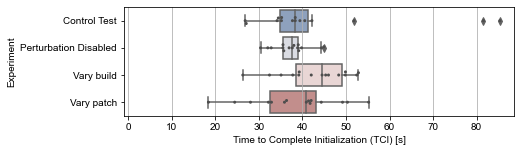

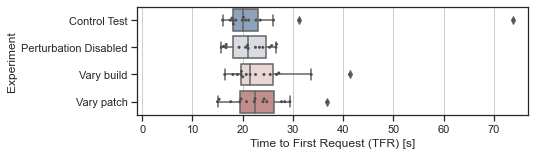

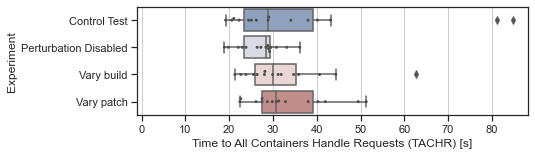

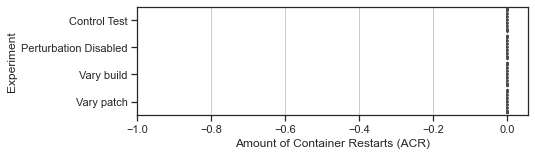

In [10]:
def show_boxplot(metric):
    f, ax = plt.subplots(figsize=(7, 2))

    sns.boxplot(data=df,
                x=metric,
                y="experiment_name",
                palette="vlag"
                )

    sns.swarmplot(data=df,
                  x=metric,
                  y="experiment_name",
                  size=3,
                  color=".3",
                  )

    sns.set(style="ticks")

    ax.xaxis.grid(True)
    ax.set_xlim(xmin=-1)
    ax.set_xlabel(METRICS[metric])
    ax.set_ylabel("Experiment")

for metric in METRICS.keys():
    show_boxplot(metric)

In [ ]:
# grid = sns.JointGrid(data=df,
#                      x="time_to_all_requests",
#                      y="restarts",
#                      )

# for experiment in EXPERIMENTS.keys():
#     plot = grid.plot_joint(sns.regplot,
#                            data=df.loc[df['experiment'] == experiment],
#                            )
sns.regplot("time_to_all_requests", "restarts", df, scatter_kws={"hue": "experiment_name"})
# sns.lmplot(hue="experiment_name",
#            x="time_to_all_requests",
#            y="restarts",
#            data=df)

# sns.jointplot(
#     # color="m",
#     xlim=(0, df["time_to_all_requests"].max()),
#     ylim=(0, df["restarts"].max()),
#     kind="reg",
#     marginal_kws={"hue": "experiment"}
# )